# Assignment 1
## Aman Kumar
## 1CR19CS012

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [28]:
from csv import writer
from csv import reader
# input_file is opened in read mode and output_file in write mode
with open('heart-disease.csv', 'r') as read_obj, \
        open('data.csv', 'w', newline='') as write_obj:
    # Create a csv.reader object from the input file object
    csv_reader = reader(read_obj)
    # Create a csv.writer object from the output file object
    csv_writer = writer(write_obj)
    # Read each row of the input csv file as list
    for row in csv_reader:
        # Add the updated row / list to the output file
        csv_writer.writerow(row)

In [29]:
data = pd.read_csv('data.csv')
print(data.shape)
data.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [32]:
#number of missing values
data.isnull().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

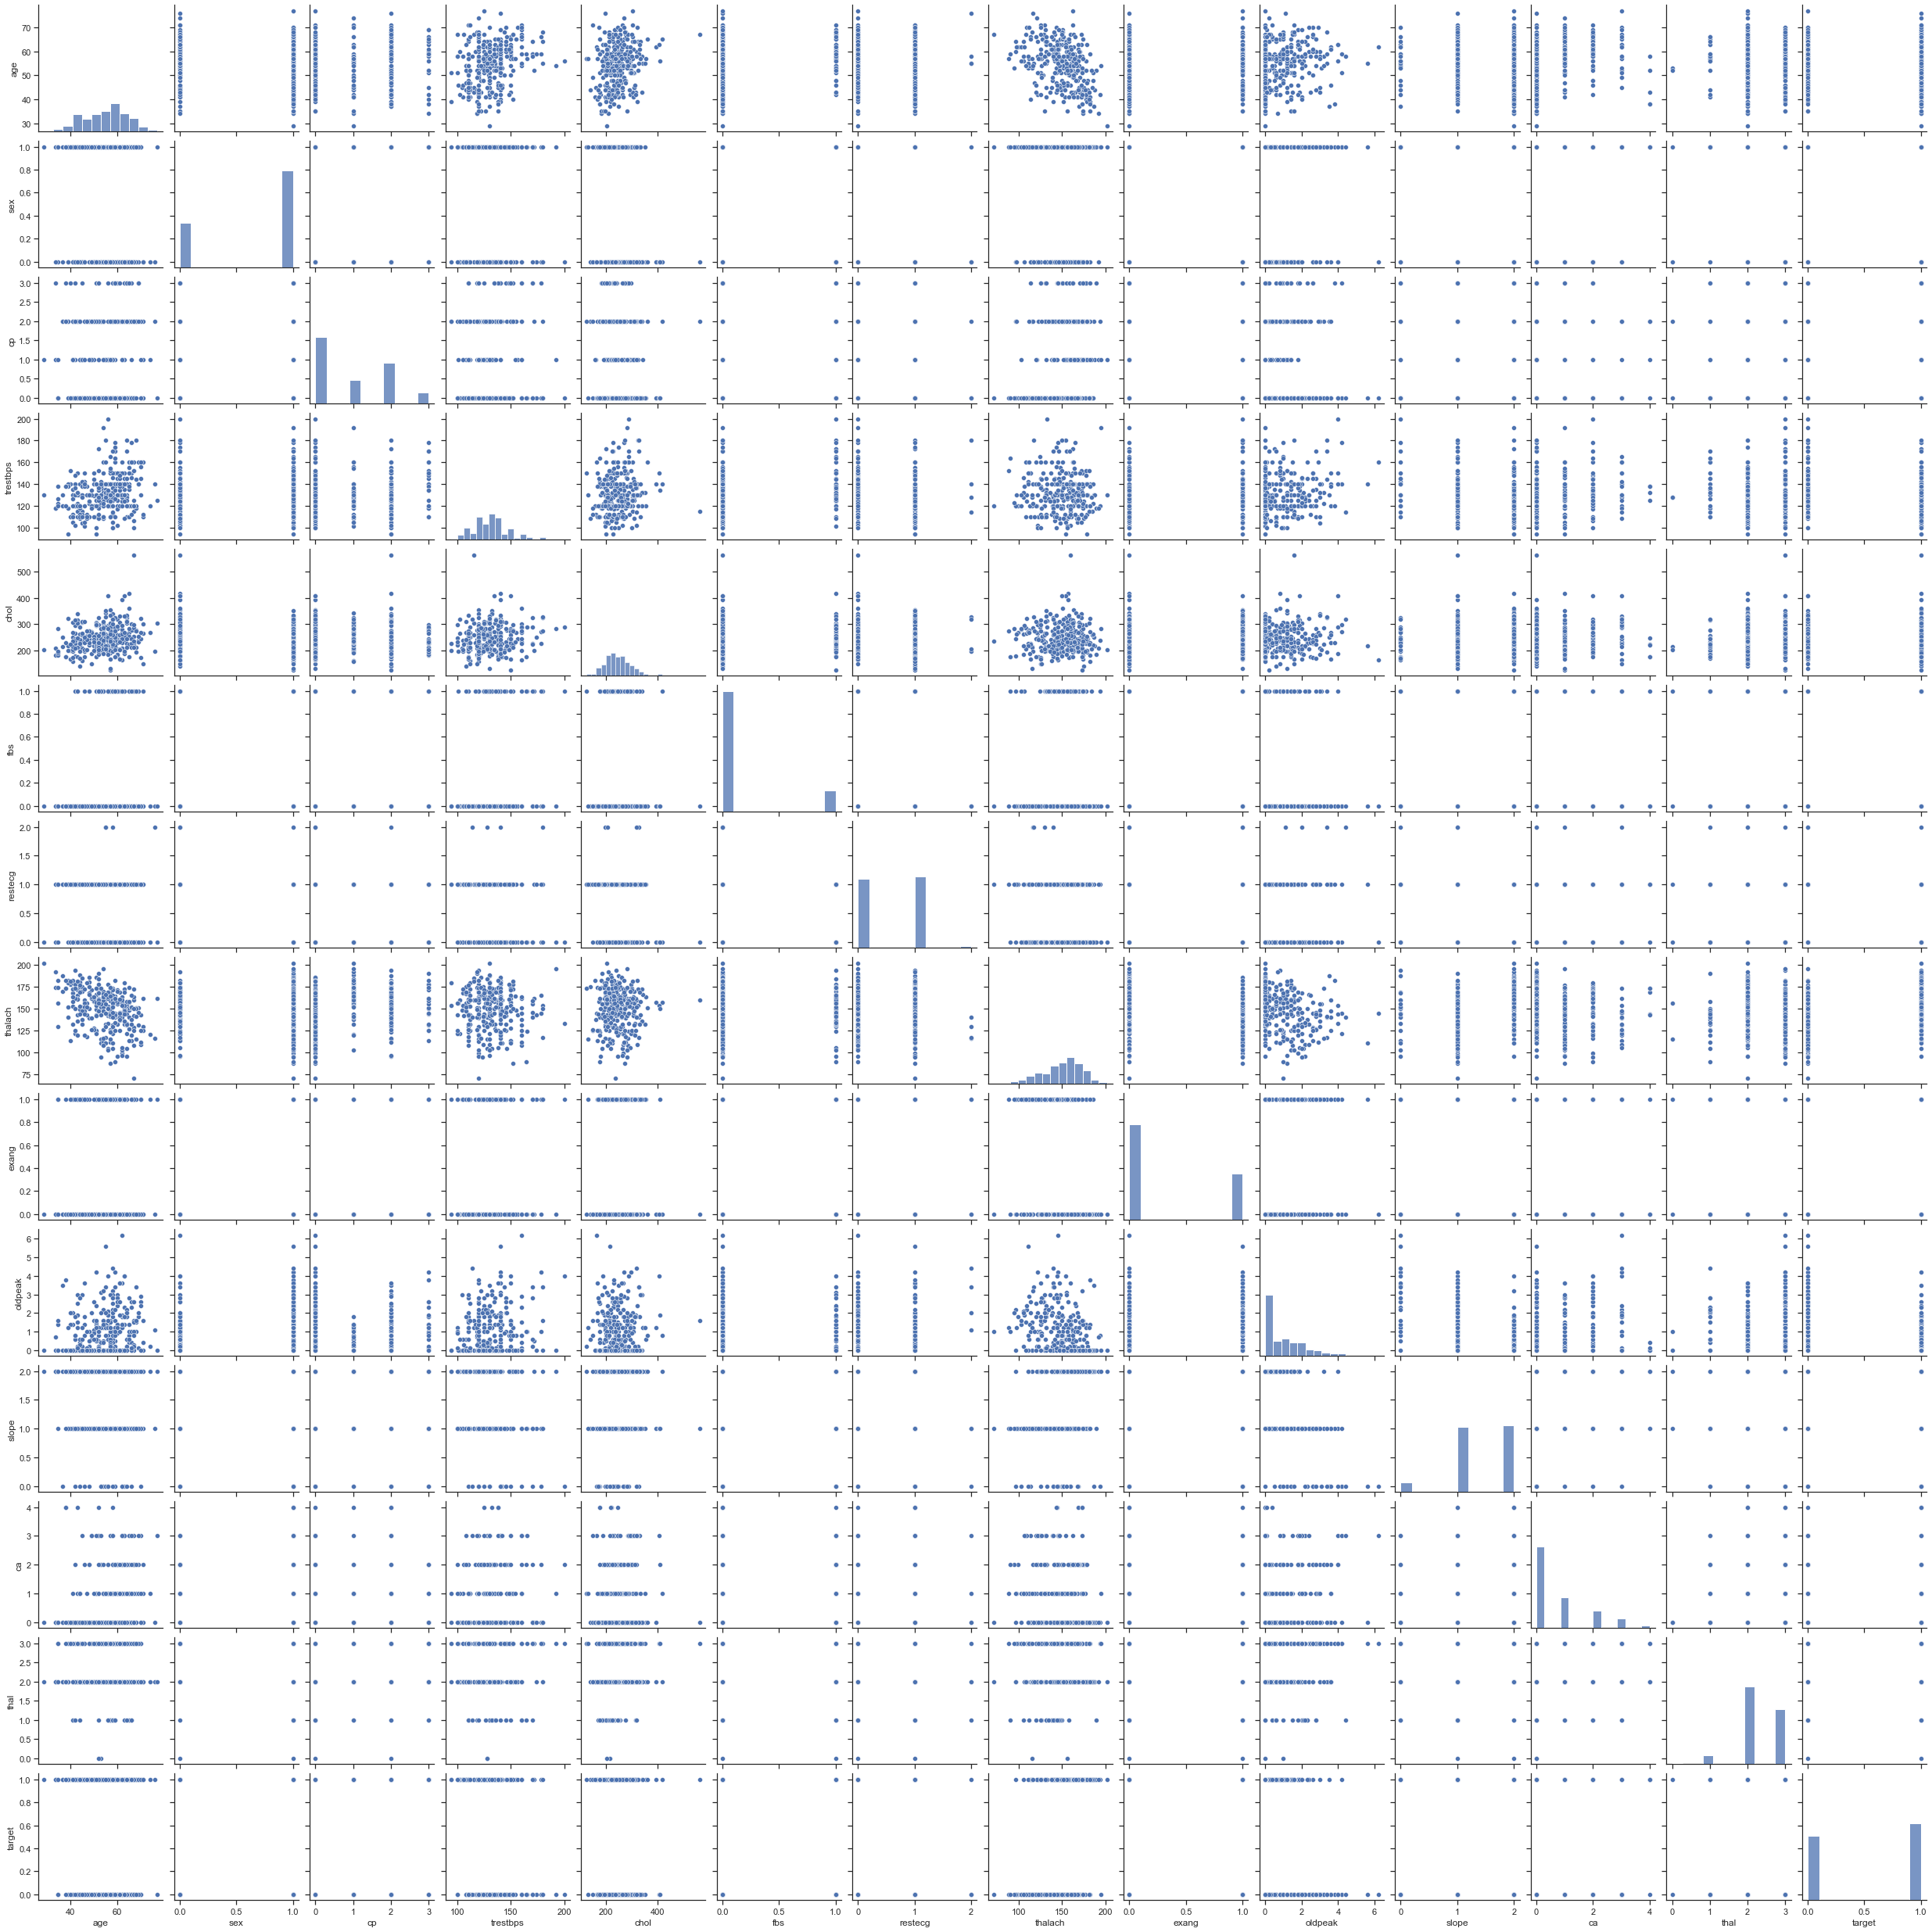

In [62]:
sns.pairplot(data)
plt.show()

In [35]:
y = data['target'] #Seperating target label
X = data.drop(['target'], axis = 1) #Removing target label
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [36]:
#Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [37]:
#Linear Regression
model = LinearRegression()
model.fit(X_train,y_train) # training data into the model

LinearRegression()

In [38]:
#Predicting using the Model
pred = model.predict(X_test)
y_pred1 = [ 0 if x < 0.5 else 1 for x in pred]
print(y_pred1)

[0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0]


In [39]:
#Logistic Regression model
Logmodel = LogisticRegression(max_iter=3000)#increasing the max iterations, 100 by default
Logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [40]:
#Predicting using the model
y_pred2 = Logmodel.predict(X_test)
y_pred2

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [41]:
#Confusion Matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm1= confusion_matrix(y_test,y_pred1)
cm2= confusion_matrix(y_test,y_pred2)
print("Confusin Matrix: \nTP FN \nFP TN")
print("Linear Regression: ")
print(cm1)
print("Logistic Regression: ")
print(cm2)

Confusin Matrix: 
TP FN 
FP TN
Linear Regression: 
[[37 12]
 [ 7 51]]
Logistic Regression: 
[[39 10]
 [ 7 51]]


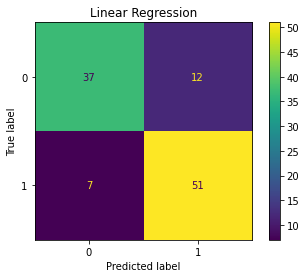

In [42]:
#Linear Regression Confusion Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1)
cm_display.plot()
plt.title("Linear Regression")
plt.show()


In [43]:
#Accuracy of the linear model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.822429906542056


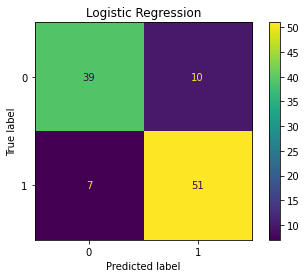

In [47]:
#Logistic Regression Confusion Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2)
cm_display.plot()
plt.title("Logistic Regression")
plt.show()

In [48]:
#Accuracy of the logistic model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.8411214953271028


ROC Curve -Linear Regression
0.8172061928219564


Text(0, 0.5, 'TP Rate')

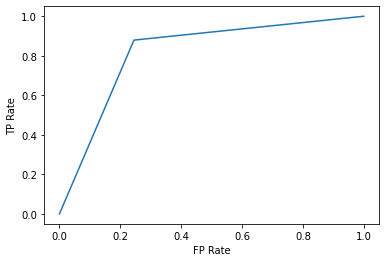

In [49]:
#ROC Curve for Linear
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curve -Linear Regression")
print(roc_auc)
plt.plot(false_positive_rate,true_positive_rate)
plt.xlabel("FP Rate")
plt.ylabel("TP Rate")

ROC Curve -Logistic Regression
0.8376143560872625


Text(0, 0.5, 'TP Rate')

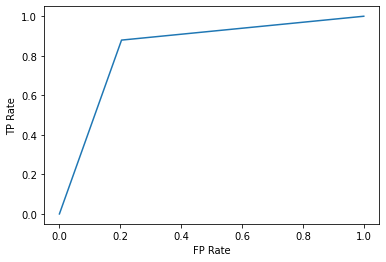

In [51]:
#ROC Curve for Linear
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curve -Logistic Regression")
print(roc_auc)
plt.plot(false_positive_rate,true_positive_rate)
plt.xlabel("FP Rate")
plt.ylabel("TP Rate")

## After applying both linear and logistic model, we found that logistic performed better for heart-disease dataset.